1) The problem you trying to solve:
#### Survelience and analysis of long video files to extract and identify individuals is a task which requires a human being to manually browse and scan the files, Instead if the current developed project is employed then we can eliminate the effort required behind scanning each video file by an individual and can get the detailed output of each individual present in the video with identification of personality based on a dataset or if there is a person which is not present in the dataset. Hence savig time and human effort and with the help of good computig systems easier and faster survellience can be obtained.

2) Why the problem is important to solve?
#### A certain length of videos are easier to scan, but if the video grows in time which becomes a tiresome and painfull task for human being and if there is a need to scan multiple video files parallely then there is a need for more than one person to perform the task. With the help of this project we can achieve as many parallel scanning of video files with multiple systems with no human effort to sit and scan and browse through media files.

3) What is your idea to solve the problem?
#### We are employing the state of the art face recognition, image clustering and classification algorithm and libraries to solve the problem to achive minimum rate of failure. The idea is to scan a video file and convert it into a series of frames into image format. These images are then scanned and the human faces are collected from these frames and stored. These human faces are clustered with the help of unsupervised clustering methods to group the faces of same individuals together so as to reduce the redundancy with the help of libraries that utilize features to find similarities between 2 different images of an individual. Once then clustering is done it  gives a set of unique faces present in the video. These faces are processed against a dataset with the help of Supervised Classification Algorithm which takes an unique image compares in the dataset learninf and identifies an individual if he is present in database or not. In the end the algorithm gives a list of people present in video and dataset and people who are present in video but not identified.

4) What differences you could make with your data science approach?
#### The dataset focuses on to reduce the human effort and labor and automate the survelience process. Along with that it also has business implications where it can be employed by:
 #### >retail stores to identify recurring customers and new customers
 #### >identify individuals who participated a meeting, attendance systems
 #### >security survelience for trespasser detection
####  >It uses efficient algorithms to employ the face recognition, clustering, classification like HAAR Cascading, Unsupervised ClustImage Principle component analysis, Convolutional Neural Networks, Supervised SVC Classifiers, . More over the scalability is one of the important features of the project as each component can be detached and replaced with better or more efficient face recognition or image processing algorithms in future as per the time and computation compatibilities etc.

## IMPORT Required Libraries


In [32]:
import cv2
import sys
import pandas as pd
import numpy as np
import os
import dlib
import fnmatch
from clustimage import Clustimage
import image
import os, os.path
import cv2

# from google.colab.patches import cv2_imshow
import face_recognition
from sklearn import svm


# Data Collection

Collecting face images from a video input


In [33]:
#----------------------------------------------
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary
# import cv2

frames=[]
val=True
count=0
cap = cv2.VideoCapture('movie/CricketPlayers.mp4')
if cap.isOpened():
    current_frame = 0
   
    while cap.isOpened():
        
        count=count+1
        ret, frame = cap.read()
          
        if ret:
            name = 'Frames/xxxxxxxxxx'+str(count)+'.jpg'
            cv2.imwrite(name, frame)
            frames.append(name)
            current_frame += 1
        else:
            cap.release()           
cv2.destroyAllWindows()

Detecting faces from frames generated from input video

# Data Exploration and Preprocessing: Exploring the Dataset 



In [34]:
# import cv2
# import sys
# import pandas as pd
# import numpy as np
# import os
# import dlib
# import fnmatch



lst = os.listdir("Frames/") # your directory path
number_files = len(lst)
print(number_files)
# Running Stable
count2=0
for i in range(1,number_files):
    name = 'xxxxxxxxxx'+str(i)+'.jpg'

    imgdata=cv2.imread('Frames/'+name)
    gray = cv2.cvtColor(imgdata, cv2.COLOR_BGR2GRAY)    

    #algo="CNN" #Use for implementing facial recognition using CNN
    algo="HaarCascade"
    
    if algo== "HaarCascade":
        haar_cascade = cv2.CascadeClassifier('hsrc/haarcascade_frontalface_default.xml')
        faces_rect = haar_cascade.detectMultiScale(gray , scaleFactor=1.1, minNeighbors=9)
        for (x, y, w, h) in faces_rect:
            count2=count2+1
            facename='faces_data/HaarCascade'+str(count2)+'.jpg'
            cropped=imgdata[y:y+h,x:x+w]
            rshape=cropped.transpose().reshape(-1)
            cv2.imwrite(facename, cropped)
            cv2.rectangle(imgdata, (x, y), (x+w, y+h), (0, 255, 0), thickness=2)
    else:
        cnn_face_detector = dlib.cnn_face_detection_model_v1('hsrc/mmod_human_face_detector.dat')
        faces_rect = cnn_face_detector(imgdata, 1)

        for face in faces_rect:
            count2=count2+1
            x = face.rect.left()
            y = face.rect.top()
            w = face.rect.right() - x
            h = face.rect.bottom() - y
            facename='outputcnn/cnn'+str(count2)+'.jpg'
            cropped=imgdata[y:y+h,x:x+w]
            rshape=cropped.transpose().reshape(-1)
            cv2.imwrite(facename, cropped)    
    

749


# Data Analysis: you can use different methods to solve the problem you proposed, and find out the best solution.

[clustimage] >WARNING> Parameter grayscale is set to True coz you are using method="hog"
[clustimage] >INFO> filepath is set to [C:\Users\ashis\AppData\Local\Temp\clustimage]
[clustimage] >INFO> filepath is set to [C:\Users\ashis\AppData\Local\Temp\clustimage]
[clustimage] >INFO> filepath is set to [C:\Users\ashis\AppData\Local\Temp\clustimage]
[clustimage] >INFO> Cleaning previous fitted model results
[clustimage] >INFO> Extracting images from: [faces_data/]
[clustimage] >INFO> [1739] files are collected recursively from path: [faces_data/]
[clustimage] >INFO> [1739] images are extracted.
[clustimage] >INFO> Reading and checking images.
[clustimage] >INFO> Reading and checking images.
100%|██████████| 1739/1739 [00:03<00:00, 531.04it/s]
[clustimage] >INFO> Extracting features using method: [hog]
100%|██████████| 1739/1739 [01:28<00:00, 19.60it/s]
[clustimage] >INFO> Extracted features using [hog]: samples=1739, features=16384
[clustimage] >INFO> Compute [tsne] embedding
[clustimage] >


[clusteval] >Fit using agglomerative with metric: euclidean, and linkage: ward
[clusteval] >Evaluate using silhouette.


100%|██████████| 22/22 [00:15<00:00,  1.45it/s]
[clustimage] >INFO> Updating cluster-labels and cluster-model based on the (1739, 16384) feature-space.


[clusteval] >Compute dendrogram threshold.
[clusteval] >Optimal number clusters detected: [21].
[clusteval] >Fin.


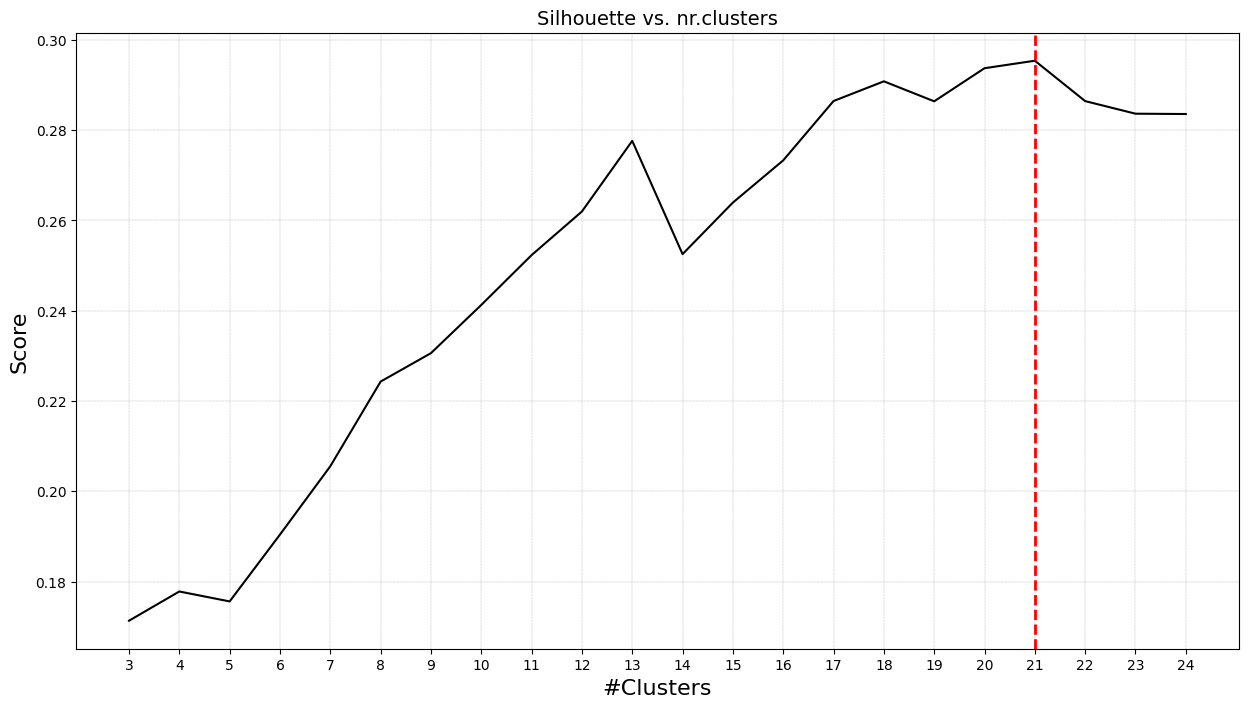

[clustimage] >INFO> Cluster evaluation using the [high] feature space of the [hog] features.



[clusteval] >Fit using agglomerative with metric: euclidean, and linkage: ward
[clusteval] >Evaluate using silhouette.


100%|██████████| 16/16 [00:09<00:00,  1.76it/s]
[clustimage] >INFO> Updating cluster-labels and cluster-model based on the (1739, 16384) feature-space.


[clusteval] >Compute dendrogram threshold.
[clusteval] >Optimal number clusters detected: [18].
[clusteval] >Fin.


In [190]:
# from clustimage import Clustimage
# Initialize with PCA
cl = Clustimage(method='hog', grayscale=True) #Use multiple methods like "HoG" and "PCA-HoG"
# Load example with faces
X = 'faces_data/'
# Initialize and run
# print(type(X))
results = cl.fit_transform(X)
# results
# # In case you need to extract the faces from the images
# face_results = cl.extract_faces(X)
# # The detected faces are extracted and stored in face_resuls. We can now easily provide the pathnames of the faces that are stored in pathnames_face.
# results= cl.fit_transform(face_results['pathnames_face'])

cl.clusteval.plot()
cl.cluster(min_clust=4, max_clust=20)


# # Make plot
# #cl.plot(show_hog=True)

# # Plot faces
# # cl.plot_faces()

# # Dendrogram depicts the clustering of the faces
# # cl.dendrogram()

#cl.unique()
unique_results=cl.unique()




pathnames_unique=unique_results['pathnames']
image_list=[]
count=0
for path in pathnames_unique:
  im=cv2.imread(path)
  image_list.append(im)
  cv2.imwrite('unique_faces/'+str(count)+'.jpg',im)
  count+=1
  




In [40]:
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary
# import face_recognition
# from sklearn import svm
# import os

# Training the SVC classifier

# The training data would be all the face encodings from all the known images and the labels are their names
encodings = []
names = []

# Training directory
train_dir = os.listdir('train_dir_bkp/')

# Loop through each person in the training directory
for person in train_dir:
    pix = os.listdir("train_dir_bkp/" + person)

    # Loop through each training image for the current person
    for person_img in pix:
        # Get the face encodings for the face in each image file
        face = face_recognition.load_image_file("train_dir_bkp/" + person + "/" + person_img)
        face_bounding_boxes = face_recognition.face_locations(face)

        #If training image contains exactly one face
        if len(face_bounding_boxes) == 1:
            face_enc = face_recognition.face_encodings(face)[0]
            # Add face encoding for current image with corresponding label (name) to the training data
            encodings.append(face_enc)
            names.append(person)
        else:
            print(person + "/" + person_img + " was skipped and can't be used for training")

# Create and train the SVC classifier
clf = svm.SVC(gamma='scale')
clf.fit(encodings,names)
list=[]
test_dir = os.listdir('unique_faces/')
for person in test_dir:
    #print(person)
# Load the test image with unknown faces into a numpy array
    test_image = face_recognition.load_image_file("unique_faces/" + person)

    # Find all the faces in the test image using the default HOG-based model
    face_locations = face_recognition.face_locations(test_image)
    no = len(face_locations)
    print("Number of faces detected: ", no)

    # Predict all the faces in the test image using the trained classifier
    print("Found:")
    for i in range(no):
        test_image_enc = face_recognition.face_encodings(test_image)[i]
        name = clf.predict([test_image_enc])
        list.append(*name)
        print(*name)

Hardik Pandya/3.jpeg was skipped and can't be used for training
Mike/mike.jpg was skipped and can't be used for training
Mohammad Shami/5.jpg was skipped and can't be used for training
Virat Kohli/8.jpeg was skipped and can't be used for training
Number of faces detected:  0
Found:
Number of faces detected:  0
Found:
Number of faces detected:  1
Found:
Ishan Kishan
Number of faces detected:  1
Found:
Ishan Kishan
Number of faces detected:  1
Found:
K L Rahul
Number of faces detected:  1
Found:
Rohit Sharma
Number of faces detected:  0
Found:
Number of faces detected:  1
Found:
Hardik Pandya
Number of faces detected:  1
Found:
Virat Kohli
Number of faces detected:  1
Found:
Rohit Sharma
Number of faces detected:  0
Found:
Number of faces detected:  1
Found:
Virat Kohli
Number of faces detected:  1
Found:
Bhuvneshwar Kumar
Number of faces detected:  1
Found:
Rohit Sharma
Number of faces detected:  1
Found:
Jasprit Bumrah
Number of faces detected:  1
Found:
Rohit Sharma
Number of faces de

In [58]:
Actual_names = ['Rohit Sharma','Ashwin','Jasprit Bumrah','Shardul Thakur','Mohammad Shami','Ravindra Jadeja','Hardik Pandya','Suryakumar Yadav(Sky)','Ishan Kishan','Rahul Chahar','Rishabh Pant','Virat Kohli','K L Rahul','Varun Chakravorty','Bhuvneshwar Kumar']
faces_recognized_by_Cluster = ['Rohit Sharma','Ashwin','Jasprit Bumrah','Shardul Thakur','Mohammad Shami','Ravindra Jadeja','Hardik Pandya','Suryakumar Yadav(Sky)','Ishan Kishan','Rahul Chahar','Virat Kohli','Varun Chakravorty','Bhuvneshwar Kumar']

In [66]:
Actual_names.sort(reverse=False)
faces_recognized_by_Cluster.sort(reverse=False)
Actual_names


['Ashwin',
 'Bhuvneshwar Kumar',
 'Hardik Pandya',
 'Ishan Kishan',
 'Jasprit Bumrah',
 'K L Rahul',
 'Mohammad Shami',
 'Rahul Chahar',
 'Ravindra Jadeja',
 'Rishabh Pant',
 'Rohit Sharma',
 'Shardul Thakur',
 'Suryakumar Yadav(Sky)',
 'Varun Chakravorty',
 'Virat Kohli']

In [115]:
Faces_recognized_by_classifier=[]
#set(list)
Faces_recognized_by_classifier = sorted(set(list))
Faces_recognized_by_classifier

['Bhuvneshwar Kumar',
 'Hardik Pandya',
 'Ishan Kishan',
 'Jasprit Bumrah',
 'K L Rahul',
 'Rohit Sharma',
 'Virat Kohli']

In [67]:
faces_recognized_by_Cluster

['Ashwin',
 'Bhuvneshwar Kumar',
 'Hardik Pandya',
 'Ishan Kishan',
 'Jasprit Bumrah',
 'Mohammad Shami',
 'Rahul Chahar',
 'Ravindra Jadeja',
 'Rohit Sharma',
 'Shardul Thakur',
 'Suryakumar Yadav(Sky)',
 'Varun Chakravorty',
 'Virat Kohli']

In [131]:
df_act=pd.DataFrame({'ActualNames': pd.Series(Actual_names)})
df_act
df_clust=pd.DataFrame({'Cluster_Names': pd.Series(faces_recognized_by_Cluster)})
df_clust
df_class=pd.DataFrame({'ClassifierNames':pd.Series(Faces_recognized_by_classifier)})
df_class
new_df=df_act.merge(df_clust,left_on=['ActualNames'],right_on=['Cluster_Names'],how='left')
results_df=new_df.merge(df_class,left_on='ActualNames',right_on='ClassifierNames',how='left')
results_df


,ActualNames,Cluster_Names,ClassifierNames
0,Ashwin,Ashwin,NaN
1,Bhuvneshwar Kumar,Bhuvneshwar Kumar,Bhuvneshwar Kumar
2,Hardik Pandya,Hardik Pandya,Hardik Pandya
3,Ishan Kishan,Ishan Kishan,Ishan Kishan
4,Jasprit Bumrah,Jasprit Bumrah,Jasprit Bumrah
5,K L Rahul,NaN,K L Rahul
6,Mohammad Shami,Mohammad Shami,NaN
7,Rahul Chahar,Rahul Chahar,NaN
8,Ravindra Jadeja,Ravindra Jadeja,NaN
9,Rishabh Pant,NaN,NaN


# Results: summarize and visualize the results discovered from the analysis

Please use figures, tables, or videos to communicate the results with the audience.


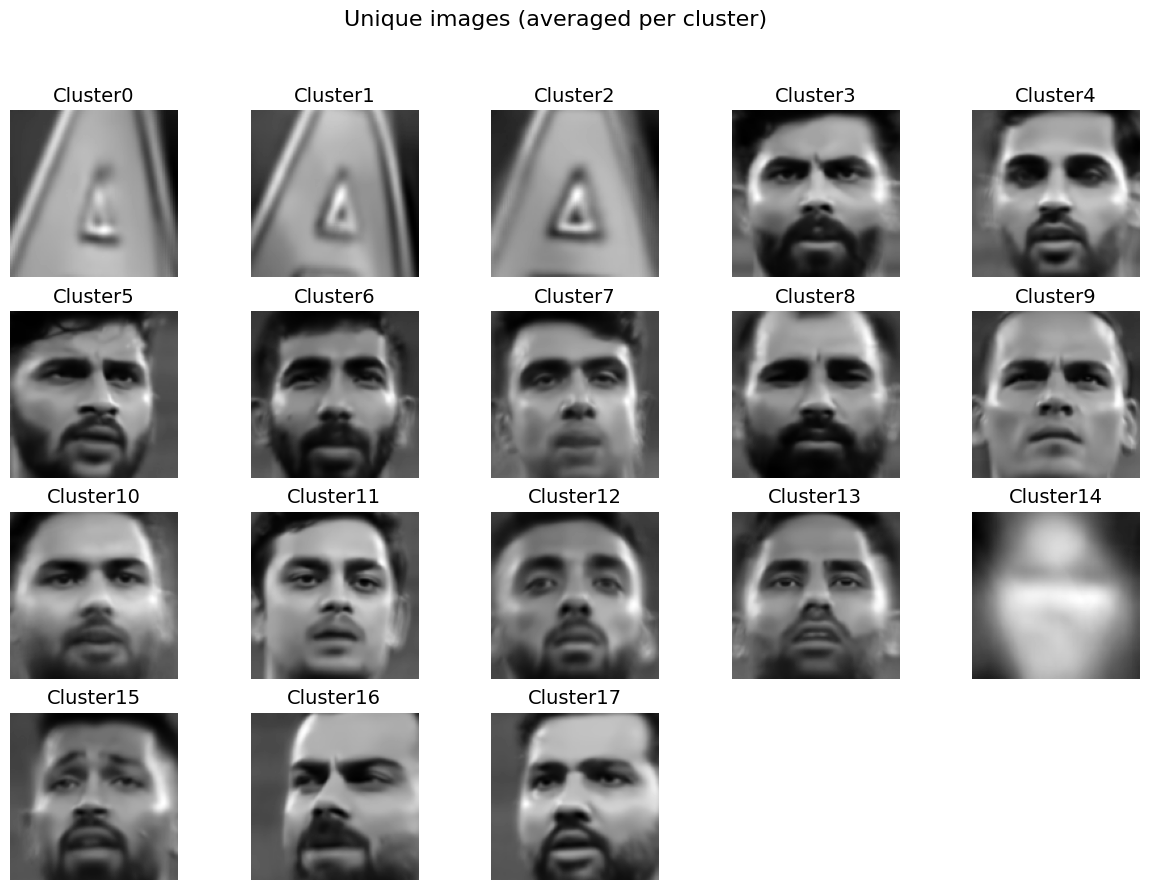

[colourmap]> Warning: Colormap [Set1] can not create [18] unique colors! Available unique colors: [9].


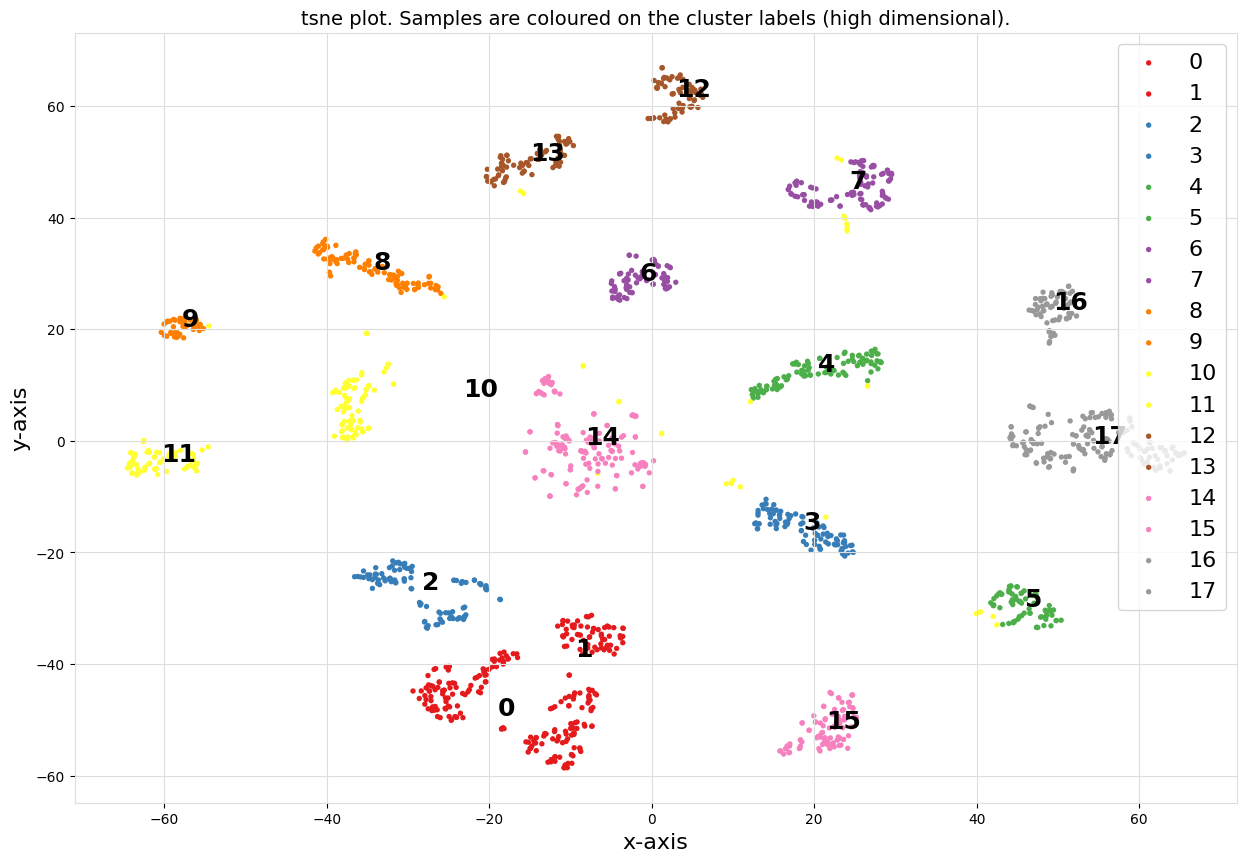

[colourmap]> Warning: Colormap [Set1] can not create [18] unique colors! Available unique colors: [9].


<Figure size 640x480 with 0 Axes>

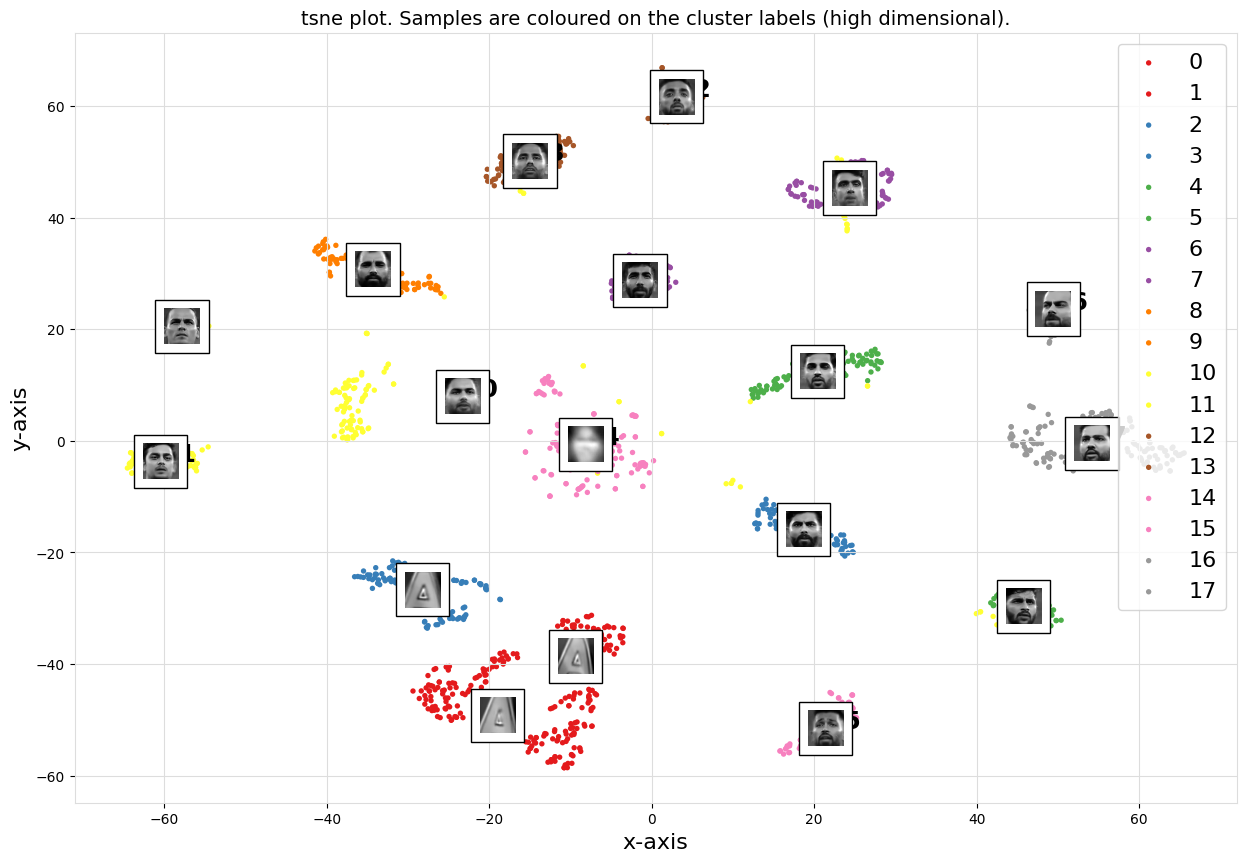

(<Figure size 1500x1000 with 1 Axes>,
 <AxesSubplot:title={'center':'tsne plot. Samples are coloured on the cluster labels (high dimensional).'}, xlabel='x-axis', ylabel='y-axis'>)

<Figure size 640x480 with 0 Axes>

In [136]:
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary
import matplotlib.pyplot as plt
import sklearn


#Plot Unique Clusters
cl.plot_unique()

# Scatter
cl.scatter(zoom=None)
cl.scatter(zoom=0.2)

,ActualNames,Cluster_Names,ClassifierNames
0,Ashwin,Ashwin,NaN
1,Bhuvneshwar Kumar,Bhuvneshwar Kumar,Bhuvneshwar Kumar
2,Hardik Pandya,Hardik Pandya,Hardik Pandya
3,Ishan Kishan,Ishan Kishan,Ishan Kishan
4,Jasprit Bumrah,Jasprit Bumrah,Jasprit Bumrah
5,K L Rahul,NaN,K L Rahul
6,Mohammad Shami,Mohammad Shami,NaN
7,Rahul Chahar,Rahul Chahar,NaN
8,Ravindra Jadeja,Ravindra Jadeja,NaN
9,Rishabh Pant,NaN,NaN


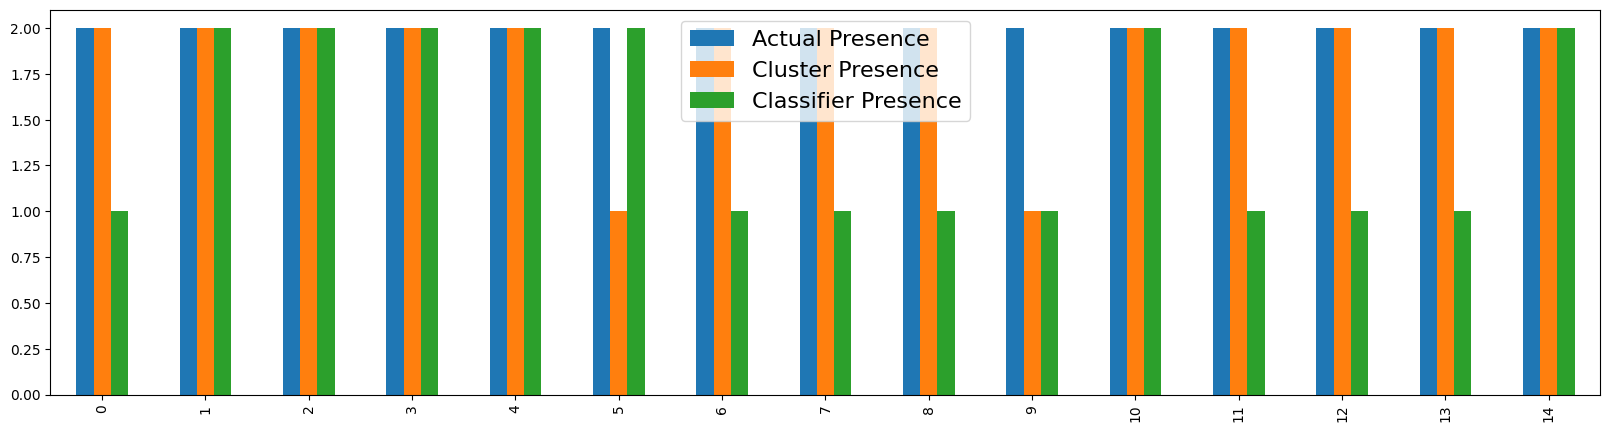

In [188]:

# output_df= pd.DataFrame({'ActualNames': pd.Series(Actual_names)})
results_df
# output_df

actualpresent=[]
clusterpresence=[]
classifierpresence=[]
index=0
# print("hello   ",results_df.loc[0,"Cluster_Names"])
for name in results_df["ActualNames"]:
    # print("val  ",name)
    actualpresent.append(2)
    if results_df.loc[index,"Cluster_Names"] == name:
        clusterpresence.append(2)
    else:
        clusterpresence.append(1)
    
    if results_df.loc[index,"ClassifierNames"] == name:
        classifierpresence.append(2)
    else:
        classifierpresence.append(1)
    index=index+1

df_act=pd.DataFrame({'Names': pd.Series(results_df["ActualNames"]), 'Actual Presence': pd.Series(actualpresent), 'Cluster Presence': pd.Series(clusterpresence), 'Classifier Presence': pd.Series(classifierpresence)})#index=results_df["ActualNames"]

ax = df_act.plot.bar( figsize=(20, 5))
# ax =df_act.loc[:,['Actual Presence','Cluster Presence']].bar( figsize=(20, 5))
display(results_df)

    

The presented plot represents the presence of the individuals in Actual Video File, Unsupervised Clusters and the classifier recognition.
The values with 2 are describe as they are present while the value 1 represents that they are absent in the following set.
Here the numbers of individuals present in the original video file were 14. While the individuals correctly identified and are present in both clusters and classifier recognition are 6. 

Hence the prediction accuracy for the current dataset is :
    (6 / 14) * 100 = 42.85 % i.e. our prediction accuracy
Also there are false positives which are present in the classification recognition but not in clusters:
    (1 / 14) * 100 = 7.14 % i.e. our false positive percentage

The accuracy score can be improved with better video quality and training set by training SCV Classifier. Also to improvise the facial orientation identification we can implement Convolutional Neural Network with scaled hardware as it takes comparatively higher time compared to other algorithms.


# Done

All set! 

**What do you need to submit?**

* **Notebook File**: Save this Jupyter notebook, and find the notebook file in your folder (for example, "filename.ipynb"). This is the file you need to submit. Please make sure all the plotted tables and figures are in the notebook. 

* **PDF Report**: please prepare a final report in the PDF form which should be at least 5 pages. The report should includes:

  * What is you motivation?

  * What data you collected?

  * How does this data support your product idea?

  * How did you analyse the data?

  * What did you find in the data?

  * (please include figures or tables in the report, but no source code)
  
* **PPT Slides**: please prepare PPT slides to present about the project. Each team present their case studies in class for 10 minutes. **Story-telling** is important, the slides should include:

  1. Motivation about the data collection, why the topic is interesting to you.

  2. Communicating Results (figure/table)

  3. Story telling (How all the parts (data, analysis, result) fit together as a story?)

Please compress all the files in a zipped file.

        
**Note: Each team only needs to submit one submission**